In [1010]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data=sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [1011]:
len(data.index)

891

<Axes: xlabel='survived', ylabel='count'>

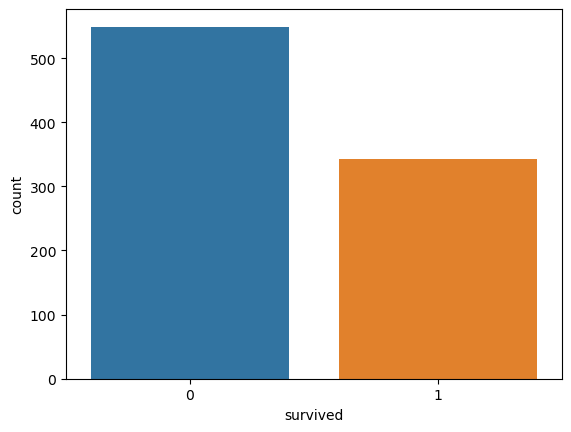

In [1012]:
sns.countplot(x="survived",data=data)

<Axes: xlabel='survived', ylabel='count'>

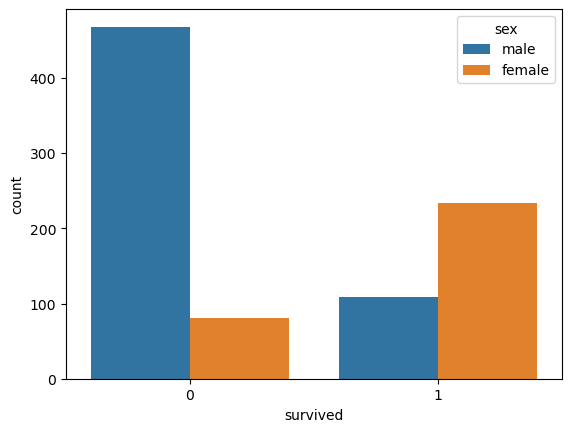

In [1013]:
sns.countplot(x="survived",hue="sex",data=data)

In [1014]:
print(data["survived"].value_counts())
print(data["sex"].value_counts())

survived
0    549
1    342
Name: count, dtype: int64
sex
male      577
female    314
Name: count, dtype: int64


In [1015]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [1016]:
data.groupby(["survived","sex"]).size()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [1017]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

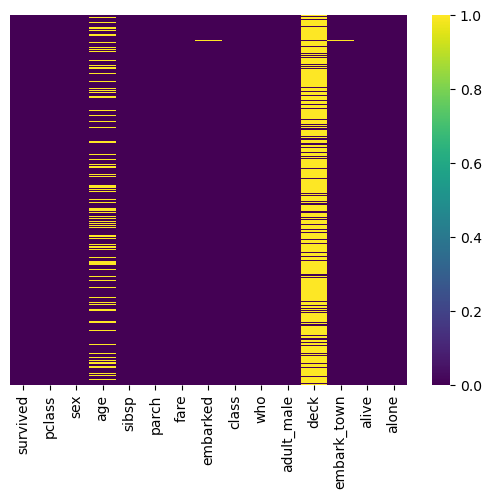

In [1018]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")


<Axes: ylabel='Frequency'>

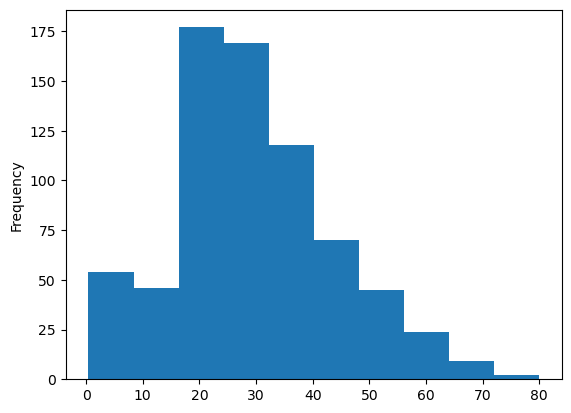

In [1019]:
data["age"].plot.hist()


In [1020]:
data.drop(columns=["deck"],inplace=True)

In [1021]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<Axes: >

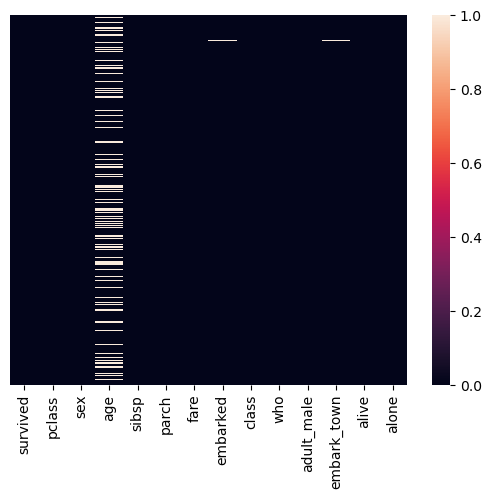

In [1022]:
sns.heatmap(data.isnull(),yticklabels=False)

In [1023]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
data["age"]=si.fit_transform(data[["age"]])

In [1024]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [1025]:
data.dropna(subset=["embarked","embark_town"],inplace=True)

<Axes: >

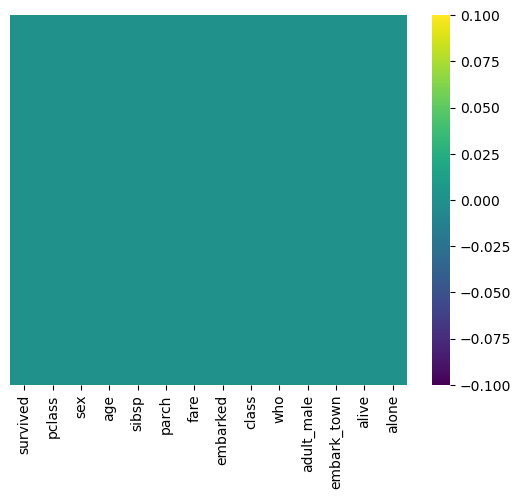

In [1026]:
sns.heatmap(data.isnull(),cmap="viridis",yticklabels=False)

In [1027]:
data.duplicated().sum()

111

In [1028]:
data.drop_duplicates(keep="first",inplace=True)

In [1029]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [1030]:
data.duplicated().sum()

0

In [1031]:
from sklearn.preprocessing import  LabelEncoder,OneHotEncoder
le= LabelEncoder()
ohe=OneHotEncoder()

data["class"]=le.fit_transform(data["class"])
data["sex"]=ohe.fit_transform(data["sex"].values.reshape(-1,1)).toarray()
data["sex"]=data["sex"].astype(int)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,2,man,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,0,woman,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,2,woman,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,0,woman,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,2,man,True,Southampton,no,True


In [1032]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     778 non-null    int64  
 1   pclass       778 non-null    int64  
 2   sex          778 non-null    int64  
 3   age          778 non-null    float64
 4   sibsp        778 non-null    int64  
 5   parch        778 non-null    int64  
 6   fare         778 non-null    float64
 7   embarked     778 non-null    object 
 8   class        778 non-null    int64  
 9   who          778 non-null    object 
 10  adult_male   778 non-null    bool   
 11  embark_town  778 non-null    object 
 12  alive        778 non-null    object 
 13  alone        778 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(4)
memory usage: 80.5+ KB


In [1033]:
data["alone"]=data["alone"].astype(int)

In [1034]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,2,man,True,Southampton,no,0
1,1,1,1,38.0,1,0,71.2833,C,0,woman,False,Cherbourg,yes,0
2,1,3,1,26.0,0,0,7.9250,S,2,woman,False,Southampton,yes,1
3,1,1,1,35.0,1,0,53.1000,S,0,woman,False,Southampton,yes,0
4,0,3,0,35.0,0,0,8.0500,S,2,man,True,Southampton,no,1


In [1035]:
data = pd.get_dummies(data, columns=["alive"], drop_first=True)

In [1036]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,alive_yes
0,0,3,0,22.0,1,0,7.2500,S,2,man,True,Southampton,0,False
1,1,1,1,38.0,1,0,71.2833,C,0,woman,False,Cherbourg,0,True
2,1,3,1,26.0,0,0,7.9250,S,2,woman,False,Southampton,1,True
3,1,1,1,35.0,1,0,53.1000,S,0,woman,False,Southampton,0,True
4,0,3,0,35.0,0,0,8.0500,S,2,man,True,Southampton,1,False


In [1037]:
data.drop(columns=["adult_male","embark_town","who"],inplace=True)

In [1038]:
data["alive_yes"]=data["alive_yes"].astype(int)

In [1039]:
data["embarked"].value_counts()

embarked
S    565
C    155
Q     58
Name: count, dtype: int64

In [1040]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,alive_yes
0,0,3,0,22.0,1,0,7.2500,S,2,0,0
1,1,1,1,38.0,1,0,71.2833,C,0,0,1
2,1,3,1,26.0,0,0,7.9250,S,2,1,1
3,1,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,2,1,0


In [1041]:
data=pd.get_dummies(data,columns=["embarked"],drop_first=True)

In [1042]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,alone,alive_yes,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,2,0,0,False,True
1,1,1,1,38.0,1,0,71.2833,0,0,1,False,False
2,1,3,1,26.0,0,0,7.9250,2,1,1,False,True
3,1,1,1,35.0,1,0,53.1000,0,0,1,False,True
4,0,3,0,35.0,0,0,8.0500,2,1,0,False,True


In [1043]:
data["embarked_Q"]=data["embarked_Q"].astype(int)

In [1044]:
data["embarked_S"]=data["embarked_S"].astype(int)

In [1045]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,alone,alive_yes,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,2,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,2,1,1,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1,0,1
4,0,3,0,35.0,0,0,8.0500,2,1,0,0,1


In [1046]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    778 non-null    int64  
 1   pclass      778 non-null    int64  
 2   sex         778 non-null    int64  
 3   age         778 non-null    float64
 4   sibsp       778 non-null    int64  
 5   parch       778 non-null    int64  
 6   fare        778 non-null    float64
 7   class       778 non-null    int64  
 8   alone       778 non-null    int64  
 9   alive_yes   778 non-null    int64  
 10  embarked_Q  778 non-null    int64  
 11  embarked_S  778 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 79.0 KB


In [1047]:
data.describe()

,survived,pclass,sex,age,sibsp,parch,fare,class,alone,alive_yes,embarked_Q,embarked_S
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,0.411311,2.249357,0.372751,29.745666,0.526992,0.419023,34.712987,1.249357,0.565553,0.411311,0.074550,0.726221
std,0.492388,0.853206,0.483848,13.674550,0.988956,0.839346,52.280326,0.853206,0.496003,0.492388,0.262833,0.446184
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.250000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,15.900000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,33.890600,2.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,1.000000,1.000000,1.000000


In [1048]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = data.iloc[:, 1:]
y = data.iloc[:, :1]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=1)

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1049]:
y_predict=logmodel.predict(xtest)

In [1050]:
from sklearn.metrics import classification_report

In [1051]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       376\n           1       1.00      1.00      1.00       247\n\n    accuracy                           1.00       623\n   macro avg       1.00      1.00      1.00       623\nweighted avg       1.00      1.00      1.00       623\n'

In [1052]:
from sklearn.metrics import confusion_matrix

In [1053]:
confusion_matrix(y_test,y_predict)

array([[376,   0],
       [  0, 247]])

In [1054]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

1.0

In [1055]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [1056]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[376   0]
 [  0 247]]


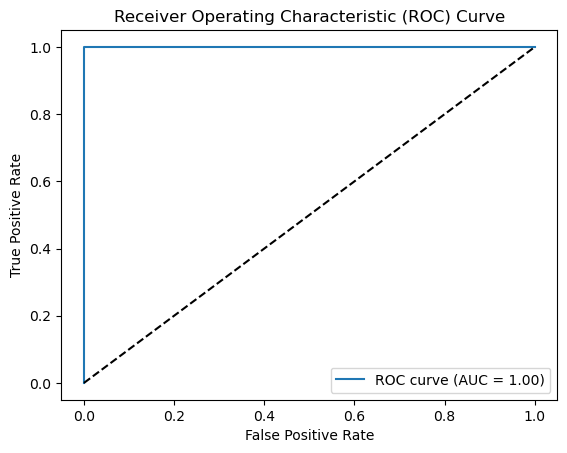

In [1057]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate predicted probabilities of the positive class
y_predict_proba = logmodel.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)
auc = roc_auc_score(y_test, y_predict_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [1058]:
len(data.index)

778

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


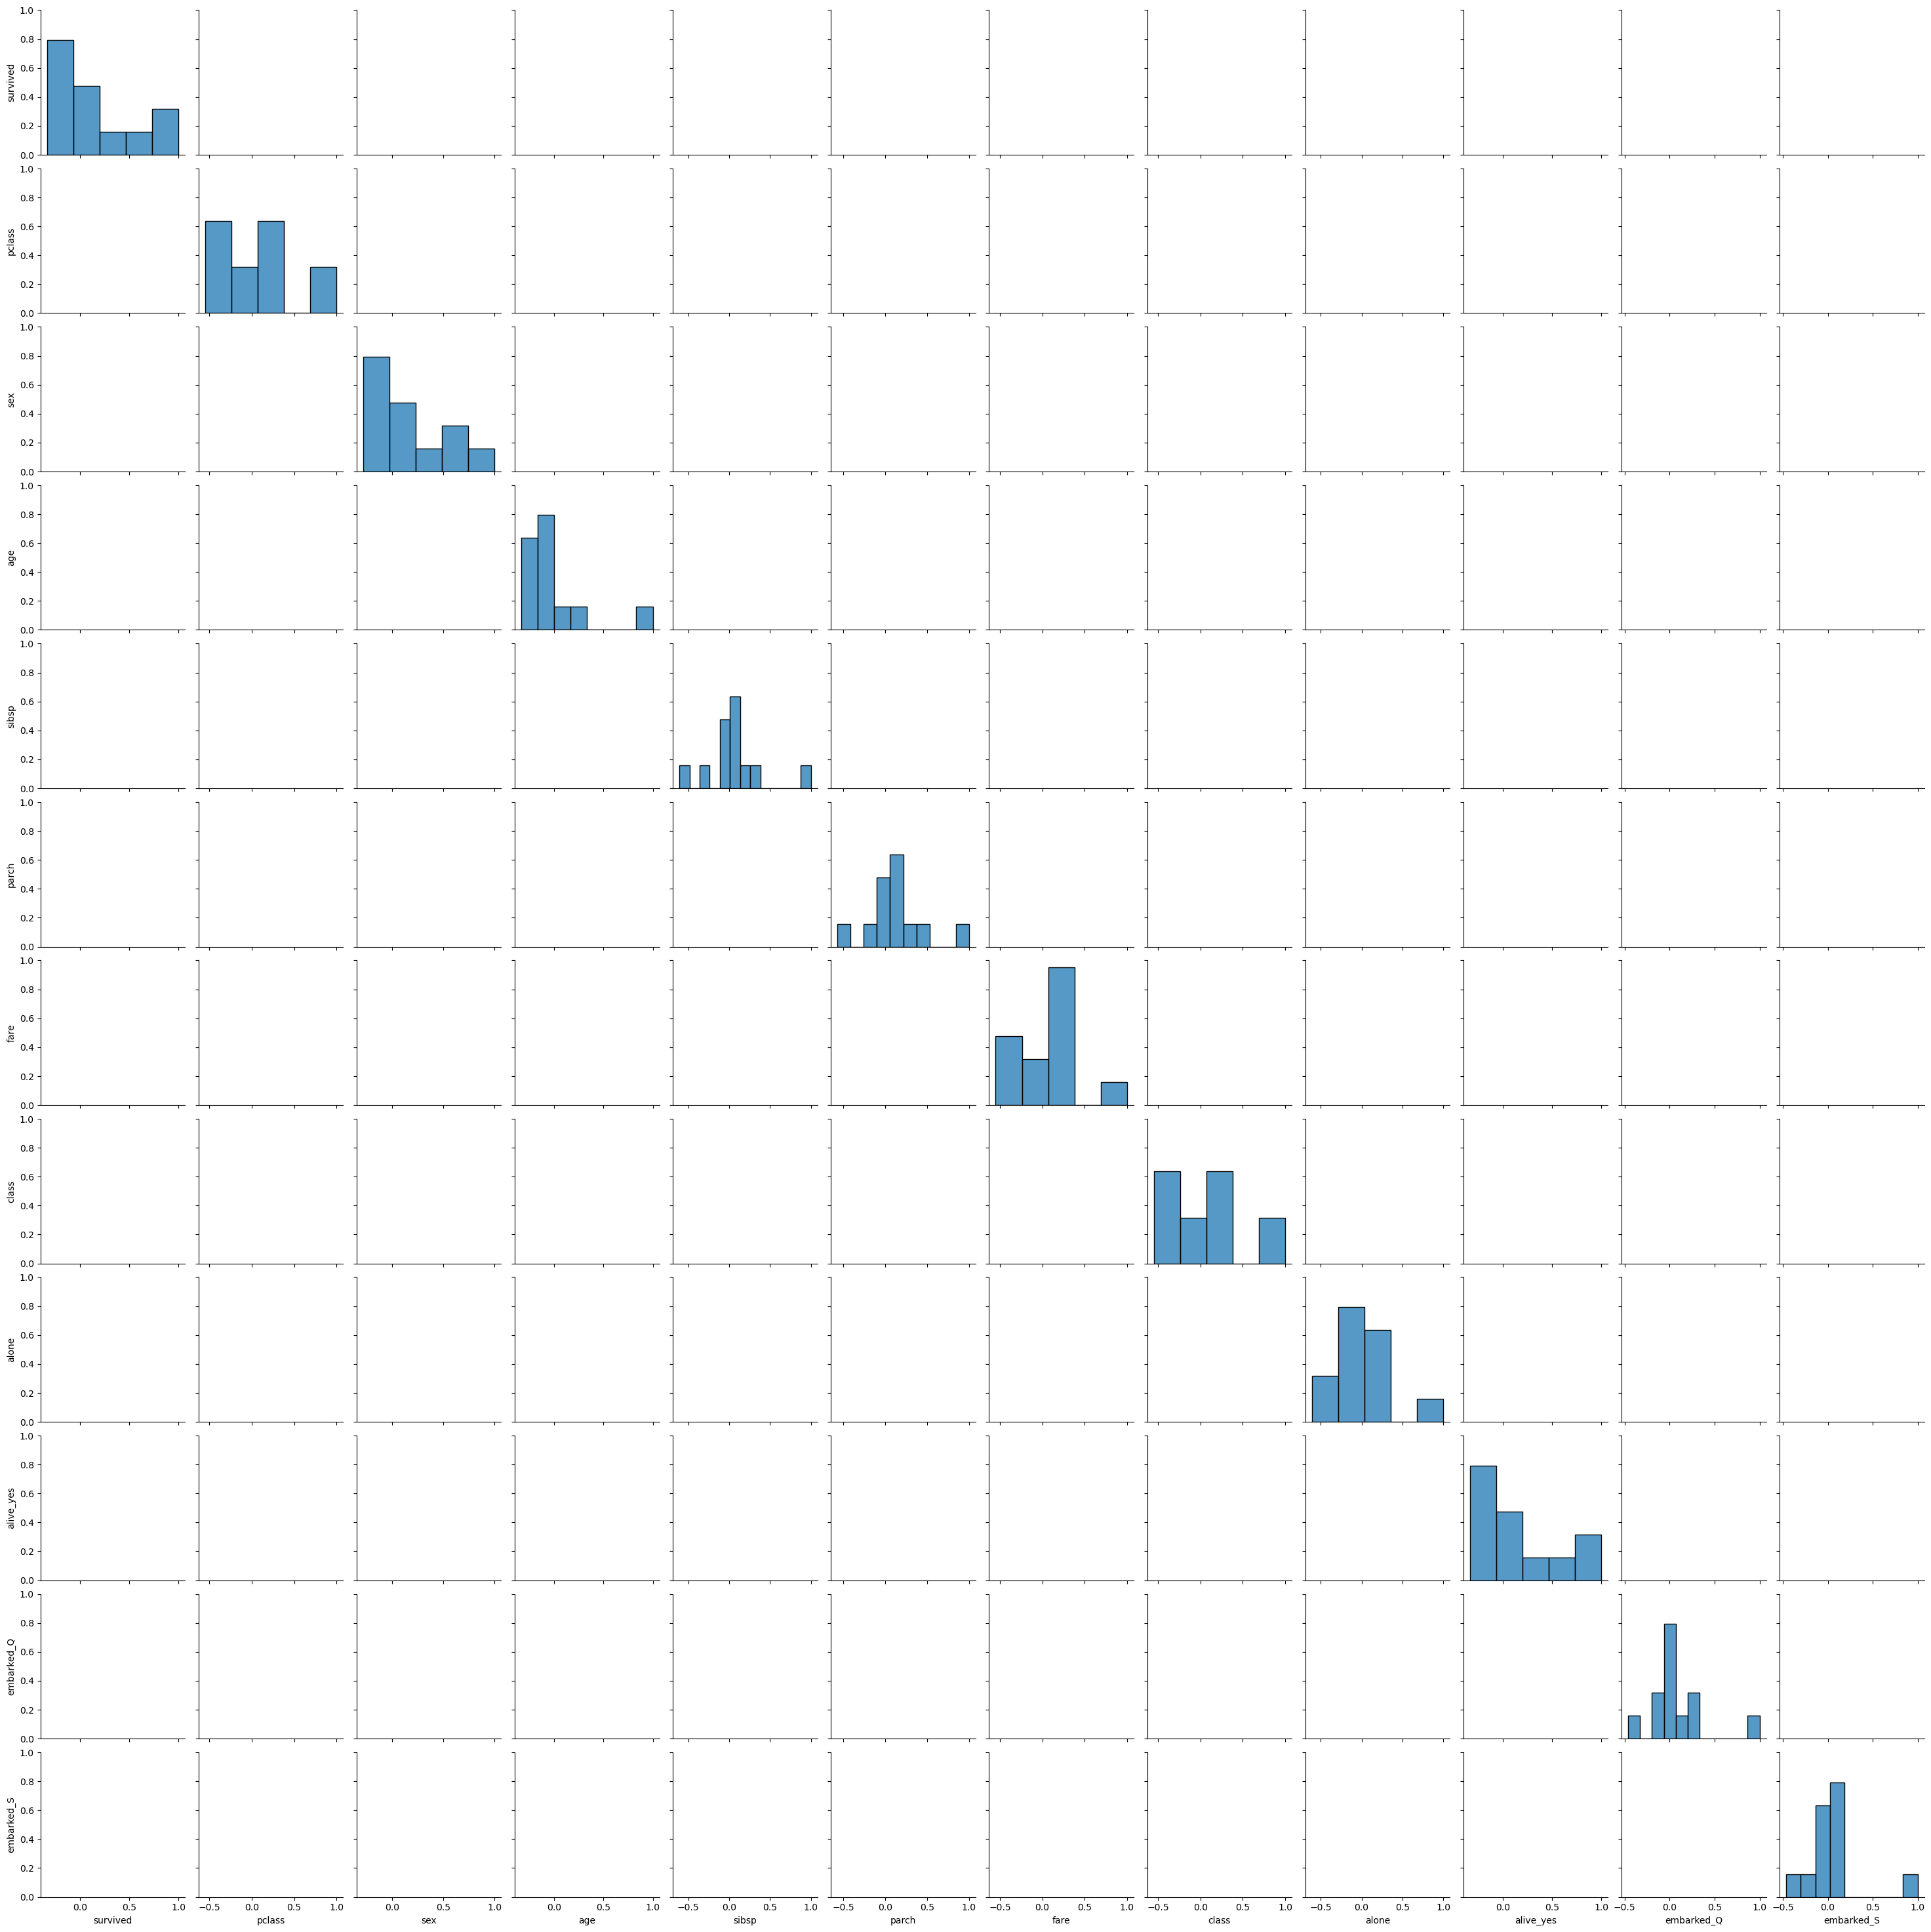

In [1066]:
sns.pairplot(data.corr(),kind="corr")